In [1]:
import random
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import copy

## Traveling throug 51 cities

In [2]:
# df = pd.read_csv('eil51.csv')
df = pd.read_csv('TSP280.csv')
df.drop(['City_number'], axis=1)
L = len(df)

In [3]:
G = nx.Graph()
pos = {}
for i in range(L):
    G.add_node(i)
    pos[i]=df['X-coordinate'][i],df['Y-coordinate'][i]

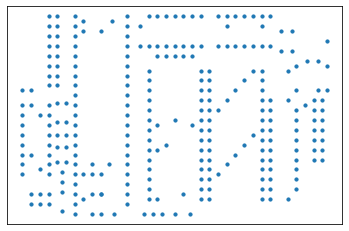

In [4]:
nx.draw_networkx(G,pos,node_size=10, node_shape = 'o',with_labels=False)
plt.xticks()
plt.show()

### Make distances matrix

In [6]:
D_matrix = [ [ 0 for i in range(L) ] for j in range(L) ]

for i in range(L):
    '''
    Calculating the distance between points in a square data set and saving them in the D_matric
    '''
    x_n1 = df['X-coordinate'][i]
    y_n1 = df['Y-coordinate'][i]
    for j in range(L):
        x_n0 = df['X-coordinate'][j]
        y_n0 = df['Y-coordinate'][j]
        d = math.sqrt((x_n1 - x_n0)**2 + (y_n1 - y_n0)**2)
        D_matrix[i][j] = d

### simulated annealing

In [9]:
def mutation(B):
    '''
    Taking a graph B and switching up two random edges
    Making use that the entier graph stays connected
    returning F an alteration of graph B where two edges are switched up
    '''
    
    edges = list(B.edges)
    
    F = B.copy()
    edge_list = random.sample(edges, k= 2)
    a = edge_list[0][0]
    b = edge_list[0][1]
    c = edge_list[1][0]
    d = edge_list[1][1]
    
    F.remove_edge(a,b)
    F.remove_edge(c,d)
    F.add_edge(a,c, distance=D_matrix[a][c])
    F.add_edge(b,d, distance=D_matrix[b][d])

    while nx.is_connected(F) == False:
        F = B.copy()
        edge_list = random.sample(edges, k= 2)
        
        a = edge_list[0][0]
        b = edge_list[0][1]
        c = edge_list[1][0]
        d = edge_list[1][1]
        
        F.remove_edge(a,b)
        F.remove_edge(c,d)
        
        F.add_edge(a,c, distance=D_matrix[a][c])
        F.add_edge(b,d, distance=D_matrix[b][d])

    else: 
        return(F)
    

def simulated_annealing_TSP(G, cooling_schedule, iter):
    '''
    Taking:
        G, a undirected graph 
        cooling_schedule, parameters used for the Simulated Anealing
        iter, the number of iterations for which the algorithm runs
    
    Returning:
        func_value, a list with the lenghts of all inbetween found "current routs"
        markoc_chain, a list with solutions within the markov Chaing
    '''
    route = G
    markov_chain = [route]
    func_value = [route.size(weight='distance')]

    current_route = route
    for i in range(iter):
        T = cooling_schedule[0] / np.log(i + 1 + cooling_schedule[1])
        prop_route = mutation(current_route)

        #Boltzman function
        func_eval = np.exp(-1 * (prop_route.size(weight='distance') - current_route.size(weight='distance')) / T)
        alpha = min(1, func_eval)
        u = np.random.uniform(0,1)

        if alpha > u:
            current_route = prop_route
            markov_chain.append(current_route)
            func_value.append(current_route.size(weight='distance'))
        else:
            markov_chain.append(current_route)
            func_value.append(current_route.size(weight='distance'))
            
    return func_value, markov_chain

In [10]:
sequence = random.sample(range(L), L)
F = nx.create_empty_copy(G, with_data=True)
    '''
    Adding Edges to a graph based on a predetermined sequence of data points.
    Adding weight to each edge based on the Distance Matrix: D_matrix
    '''
for i in range(L):
    n = sequence[i]
    m = sequence[i-1]
    F.add_edge(m,n, distance=D_matrix[m][n])

cooling_schedule = [14, 13]
iter = 50000
func_value, markov_chain = simulated_annealing_TSP(F, cooling_schedule, iter)

In [11]:
min_value = min(func_value) 
min_index = func_value.index(min_value) 
print('Shortes route, D =',round(min_value,2))


fig, axes = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Traveling Salesperson Problem')

plt.subplot(131)
nx.draw_networkx(F, pos, node_size=10, node_shape = 'o',with_labels=False)

plt.subplot(132)
nx.draw_networkx(markov_chain[min_index], pos, node_size=10, node_shape = 'o',with_labels=False)

plt.subplot(133)
plt.plot(list(range(len(func_value))),func_value)
plt.show()



In [12]:
short_r = []
D_short = []

for i in range(100):
    '''
    Running the function Simulated_Annealing_TSP a 100 times and adding the 
    best solution of each run to a list
    '''
    sequence = random.sample(range(L), L)
    F = nx.create_empty_copy(G, with_data=True)
    # Adding edges based on a random sequence
    for i in range(L):
        n = sequence[i]
        m = sequence[i-1]
        F.add_edge(m,n, distance=D_matrix[m][n])

    cooling_schedule = [14, 13]
    iter = 50000
    func_value, markov_chain = simulated_annealing_TSP(F, cooling_schedule, iter)
    
    min_value = min(func_value) 
    min_index = func_value.index(min_value) 
    
    short_r.append(markov_chain[min_index])
    D_short.append(min_value)


In [17]:
min_value = min(D_short) 
min_index = D_short.index(min_value) 

X = short_r[min_index]
print(X)

The shortest route found with a total distance of 3456


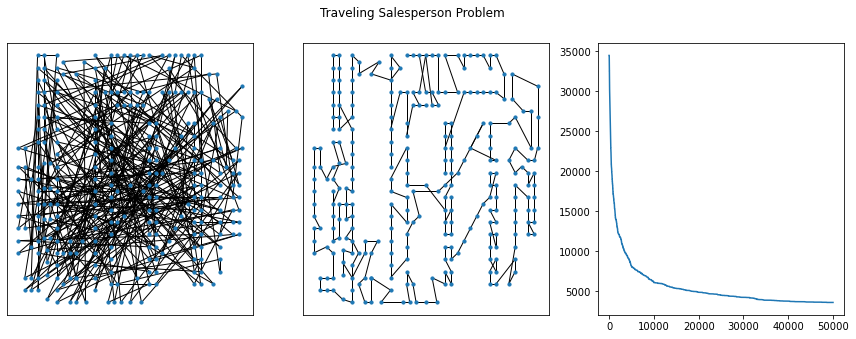

In [21]:
print('The shortest route found with a total distance of', round(min_value))
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Traveling Salesperson Problem')

plt.subplot(131)
nx.draw_networkx(G, pos, node_size=10, node_shape = 'o',with_labels=False)

plt.subplot(132)
nx.draw_networkx(X, pos, node_size=10, node_shape = 'o',with_labels=False)

plt.subplot(133)
plt.plot(list(range(len(func_value))),func_value)
plt.show()